# *analyzing*

In [345]:
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, LearningCurveDisplay, learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [346]:
drive.mount('/content/drive')
df_train = pd.read_csv('/content/drive/MyDrive/Coding/Projects/Kaggle/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Coding/Projects/Kaggle/titanic/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


In [348]:
df_test['Survived'] = np.NaN

In [349]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,NaN


In [350]:
all_data = df_train.append(df_test)

In [351]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [353]:
print(df_train.shape, df_test.shape, all_data.shape)

(891, 12) (418, 12) (1309, 12)


In [354]:
all_data.info() # mixed dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [355]:
all_data.describe() # numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [356]:
all_data.describe(include=['O']) # object columns

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


Check duplicated columns

In [357]:
all_data = all_data.drop_duplicates(keep='first')
all_data.shape

(1309, 12)

Check duplicated rows

In [358]:
all_data[all_data.duplicated()]
all_data.shape

(1309, 12)

Handling spaces

In [359]:
all_data = all_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check upper-lower case

In [360]:
all_data = all_data.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1.0,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1.0,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1.0,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0.0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


Check special characters

In [361]:
import string
alphabet = string.ascii_letters+string.punctuation

In [362]:
all_data.columns.str.strip(alphabet).astype(bool).any()

False

Check null values

In [363]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

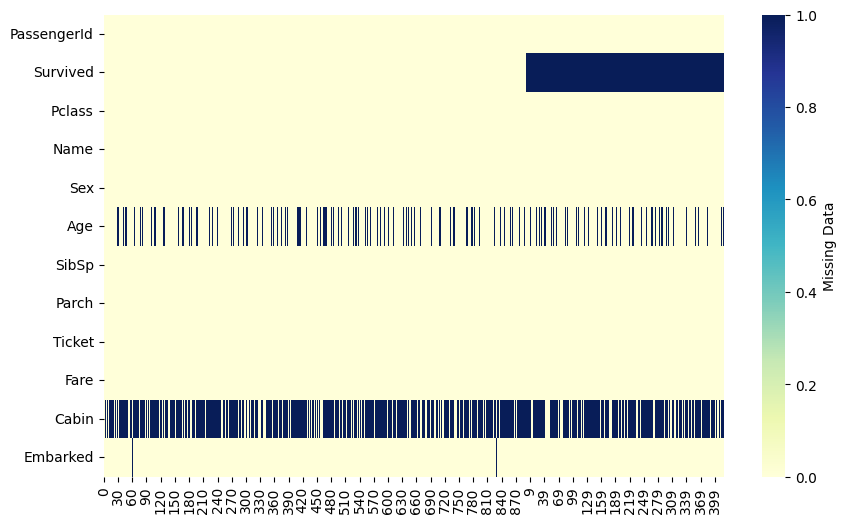

In [364]:
plt.figure(figsize=(10,6))
sns.heatmap(all_data.isna().transpose(),
cmap="YlGnBu",
cbar_kws={'label': 'Missing Data'})

Check data is Imbalanced or not

<Axes: >

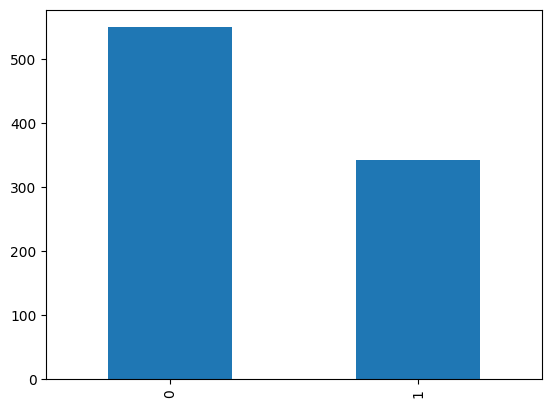

In [365]:
df_train['Survived'].value_counts().plot(kind='bar')

Drop columns

In [366]:
all_data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True) # Name, passenger id and ticket are unnecessary, cabin has too many null values.

In [367]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,s
1,2,1.0,1,female,38.0,1,0,71.2833,c
2,3,1.0,3,female,26.0,0,0,7.9250,s
3,4,1.0,1,female,35.0,1,0,53.1000,s
4,5,0.0,3,male,35.0,0,0,8.0500,s


# *age*

Fill null values with mean

In [368]:
all_data['Age'].fillna(all_data['Age'].mean(), inplace=True)
all_data['Age'].isnull().sum()

0

In [369]:
df_train = all_data[:891]
df_test = all_data[891:]
df_train.shape, df_test.shape

((891, 9), (418, 9))

Check outliers for age column in train dataset

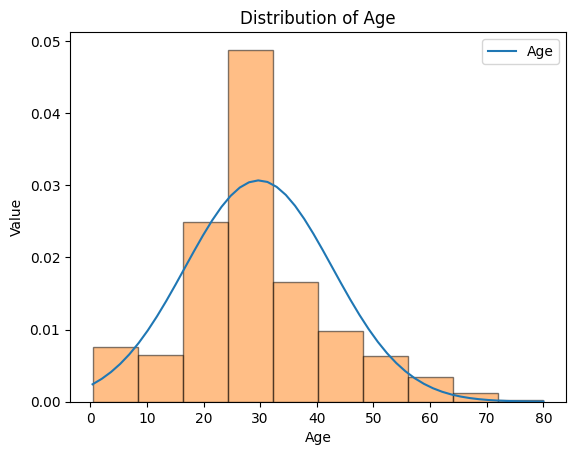

In [370]:
domain = np.linspace(np.min(df_train['Age']), np.max(df_train['Age']))
plt.plot(domain, norm.pdf(domain, df_train['Age'].mean(), df_train['Age'].std()), label='Age')
plt.hist(df_train['Age'], edgecolor='black', alpha=0.5, density=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()
plt.show()

In [371]:
# Data is normally distributed so I can use z_score for handling outliers
upper_limit = df_train['Age'].mean() + 3*df_train['Age'].std()
lower_limit = df_train['Age'].mean() - 3*df_train['Age'].std()
upper_limit, lower_limit

(68.7419313273417, -9.271378314742794)

In [372]:
df_train.loc[(df_train['Age'] > upper_limit) | (df_train['Age'] < lower_limit)] # drop 7 rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,97,0.0,1,male,71.0,0,0,34.6542,c
116,117,0.0,3,male,70.5,0,0,7.7500,q
493,494,0.0,1,male,71.0,0,0,49.5042,c
630,631,1.0,1,male,80.0,0,0,30.0000,s
672,673,0.0,2,male,70.0,0,0,10.5000,s
745,746,0.0,1,male,70.0,1,1,71.0000,s
851,852,0.0,3,male,74.0,0,0,7.7750,s


In [373]:
df_train = df_train.loc[(df_train['Age'] < upper_limit) & (df_train['Age'] > lower_limit)]
df_train.shape

(884, 9)

In [374]:
# update all_data with new df_train

all_data = all_data[891:]
all_data.shape # just test dataset left

(418, 9)

In [375]:
all_data['Survived'].value_counts()

Series([], Name: Survived, dtype: int64)

In [376]:
all_data = pd.DataFrame(df_train, columns=all_data.columns).append(all_data, ignore_index=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,s
1,2,1.0,1,female,38.0,1,0,71.2833,c
2,3,1.0,3,female,26.0,0,0,7.9250,s
3,4,1.0,1,female,35.0,1,0,53.1000,s
4,5,0.0,3,male,35.0,0,0,8.0500,s


In [377]:
all_data.shape # dropped 7 outliers

(1302, 9)

Age groups in the train and test datasets must be the same. Because an age that belongs to the 3rd group in the train dataset may belong to the 4th group in the test dataset.

In [378]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 4)
all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.0942, 19.128]",0.481707
1,"(19.128, 38.085]",0.358182
2,"(38.085, 57.043]",0.388889
3,"(57.043, 76.0]",0.346154


In [379]:
all_data.loc[all_data['Age']<=20,'Age']=0
all_data.loc[(all_data['Age']>20)&(all_data['Age']<=39),'Age']=1
all_data.loc[(all_data['Age']>39)&(all_data['Age']<=58),'Age']=2
all_data.loc[(all_data['Age']>58)&(all_data['Age']<=76),'Age']=3

In [380]:
all_data['Age'] = all_data['Age'].apply(np.ceil).astype('int64') # A person's age can not be float. Round up. Must be integer. Convert it to int64.

In [381]:
all_data['Age'].unique()

array([1, 2, 0, 3])

In [382]:
all_data.drop(['AgeBand'], axis=1, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [383]:
all_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [384]:
all_data.shape

(1302, 9)

In [385]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [386]:
df_train = all_data[:884] # to continue with new changes in the train dataset.

# *fare*

Fill null values with mean

In [387]:
all_data['Fare'].fillna(all_data['Fare'].mean(), inplace=True)
all_data['Fare'].isnull().sum()

0

Check outliers for fare column in train dataset

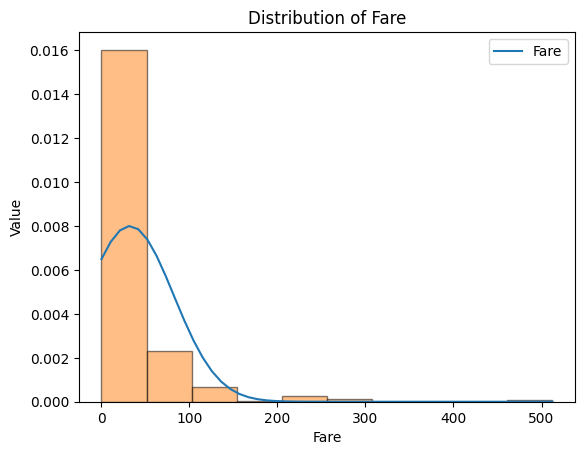

In [388]:
domain = np.linspace(np.min(df_train['Fare']), np.max(df_train['Fare']))
plt.plot(domain, norm.pdf(domain, df_train['Fare'].mean(), df_train['Fare'].std()), label='Fare')
plt.hist(df_train['Fare'], edgecolor='black', alpha=0.5, density=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Value')
plt.legend()
plt.show()

In [389]:
# positively skewed and imbalance data. I can use IQR method.
Q1 = df_train.Fare.quantile(0.05)
Q3 = df_train.Fare.quantile(0.95)
IQR = Q3 - Q1

In [390]:
min_threshold = Q1 - 1.5*IQR
max_threshold = Q3 + 1.5*IQR
min_threshold, max_threshold

(-151.3118674999997, 271.45311249999946)

In [391]:
df_train[(df_train['Fare'] > max_threshold) | (df_train['Fare'] < min_threshold)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
256,259,1.0,1,female,1,0,0,512.3292,c
674,680,1.0,1,male,1,0,1,512.3292,c
732,738,1.0,1,male,1,0,0,512.3292,c


In [392]:
df_train = df_train.loc[(df_train['Fare'] < max_threshold) & (df_train['Fare'] > min_threshold)]
df_train.shape # dropped 3 columns

(881, 9)

In [393]:
# update all_data with new df_train

all_data = all_data[884:]
all_data.shape

(418, 9)

In [394]:
all_data = pd.DataFrame(df_train, columns=all_data.columns).append(all_data, ignore_index=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,7.2500,s
1,2,1.0,1,female,1,1,0,71.2833,c
2,3,1.0,3,female,1,0,0,7.9250,s
3,4,1.0,1,female,1,1,0,53.1000,s
4,5,0.0,3,male,1,0,0,8.0500,s


In [395]:
all_data.shape # dropped 3 outliers

(1299, 9)

Same as age, fare groups in the train and test datasets must be the same.

In [396]:
all_data['FareBand'] = pd.cut(all_data['Fare'], 4)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.369976
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",NaN


In [397]:
all_data.loc[all_data['Fare']<=129,'Fare']=0
all_data.loc[(all_data['Fare']>129)&(all_data['Fare']<=257),'Fare']=1
all_data.loc[(all_data['Fare']>257)&(all_data['Fare']<=385),'Fare']=2
all_data.loc[(all_data['Fare']>385)&(all_data['Fare']<=513),'Fare']=3

In [398]:
all_data['Fare'] = all_data['Fare'].astype(int)

In [399]:
all_data['Fare'].unique()

array([0, 2, 1, 3])

In [400]:
all_data.drop(['FareBand'], axis=1, inplace=True)
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,0,s
1,2,1.0,1,female,1,1,0,0,c
2,3,1.0,3,female,1,0,0,0,s
3,4,1.0,1,female,1,1,0,0,s
4,5,0.0,3,male,1,0,0,0,s


In [401]:
all_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Sex             object
Age              int64
SibSp            int64
Parch            int64
Fare             int64
Embarked        object
dtype: object

# *embarked*

In [402]:
all_data['Embarked'].unique() # 2 nan columns fill with mode
all_data['Embarked'].fillna(all_data['Embarked'].mode()[0], inplace=True)

In [403]:
all_data['Embarked'].value_counts()

s    912
c    265
q    122
Name: Embarked, dtype: int64

In [404]:
all_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,c,0.552147
1,q,0.394737
2,s,0.339564


In [405]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,1,1,0,0,s
1,2,1.0,1,female,1,1,0,0,c
2,3,1.0,3,female,1,0,0,0,s
3,4,1.0,1,female,1,1,0,0,s
4,5,0.0,3,male,1,0,0,0,s


# *parch*

In [406]:
all_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.551724
2,2,0.500000
0,0,0.343284
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


# *SibSp*

In [407]:
all_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.343907
1,1,0.538462
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp and Parch have 0 correlations in some cases. They have good correlation with each other. I will use these columns for extracting new features.

In [408]:
all_data['family'] = all_data[['Parch', 'SibSp']].sum(axis=1)

In [409]:
all_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [410]:
all_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,1,0.0,3,male,1,0,s,1
1,2,1.0,1,female,1,0,c,1
2,3,1.0,3,female,1,0,s,0
3,4,1.0,1,female,1,0,s,1
4,5,0.0,3,male,1,0,s,0


# *sex*

In [411]:
all_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.741214
1,male,0.186620


# *Pclass*

In [412]:
all_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.631579
1,2,0.475410
2,3,0.243354


# *dummy variables*

In [413]:
all_data = pd.get_dummies(all_data, columns = ['Sex', 'Embarked'], dtype='int', drop_first='True') # dtype=int

In [414]:
all_data.head()

,PassengerId,Survived,Pclass,Age,Fare,family,Sex_male,Embarked_q,Embarked_s
0,1,0.0,3,1,0,1,1,0,1
1,2,1.0,1,1,0,1,0,0,0
2,3,1.0,3,1,0,0,0,0,1
3,4,1.0,1,1,0,1,0,0,1
4,5,0.0,3,1,0,0,1,0,1


# *splitting data*

In [415]:
df_train = all_data[:881] # # We have 881 rows in training data
df_test = all_data[881:] # We have 418 rows in test data
all_data.shape, df_train.shape, df_test.shape

((1299, 9), (881, 9), (418, 9))

In [416]:
df_test['Survived'].value_counts() # Drop this column
passenger_id = df_test[:891].PassengerId # for submission
df_test.drop(['PassengerId'], axis=1, inplace=True)

In [417]:
df_train.drop(['PassengerId'], axis=1, inplace=True)
# convert df_train['Survived'] column to int because when we add NaN values, column converted to float.
df_train['Survived'] = df_train['Survived'].astype(int)

In [418]:
df_test.drop(['Survived'], axis=1, inplace=True)

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [419]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# *scaling*

In [420]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) # some algorithms don't need to be scaled. (Gaussian Naive Bayes, Decision Tree, Random Forest)
X_test_scaled = sc.fit_transform(X_test)

X_test_data_scaled = sc.fit_transform(df_test)

# logistic regression

In [421]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

In [422]:
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       104
           1       0.76      0.68      0.72        73

    accuracy                           0.78       177
   macro avg       0.78      0.77      0.77       177
weighted avg       0.78      0.78      0.78       177



In [423]:
log_reg_results = {
  'Logistic Regression Accuracy': round(accuracy_score(log_reg_pred, y_test) * 100, 2)
}

log_reg_results

{'Logistic Regression Accuracy': 77.97}

In [424]:
tn, fp, fn, tp = confusion_matrix(y_test, log_reg_pred).ravel()

print('True Positive (TP): ', tp)
print('True Negative (TN): ', tn)
print('False Positive (FP): ', fp)
print('False Negative (FN): ', fn)

True Positive (TP):  50
True Negative (TN):  88
False Positive (FP):  16
False Negative (FN):  23


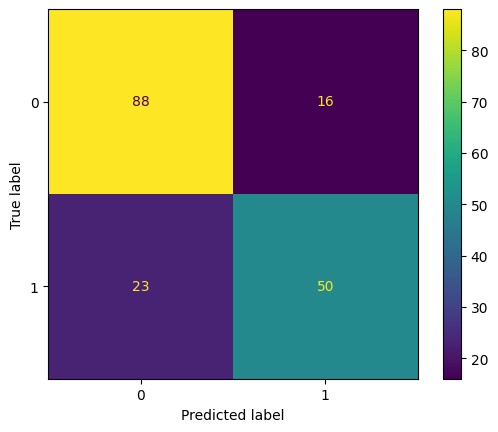

In [425]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, log_reg_pred), display_labels=log_reg.classes_).plot()
plt.show()

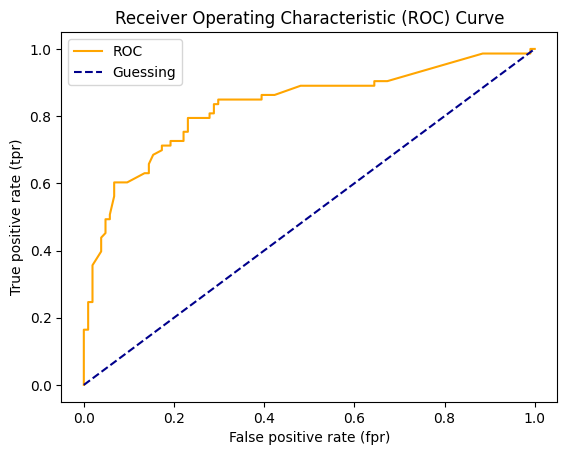

0.8308087460484721

In [426]:
y_probs = log_reg.predict_proba(X_test_scaled)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

check overfitting

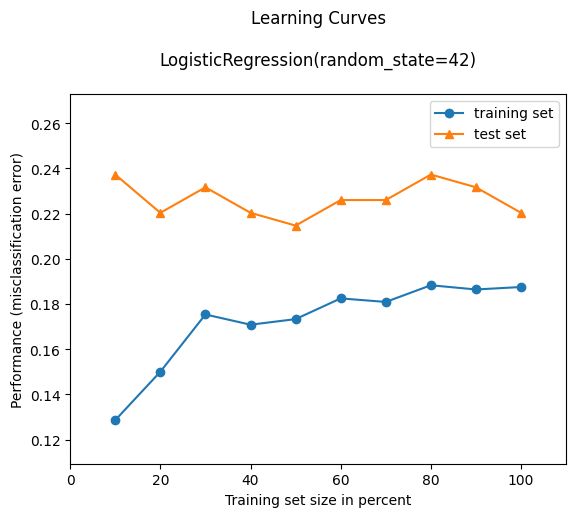

In [427]:
plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, log_reg)
plt.show()

It is not overfitting. The test curve could converge towards the training curve if more training data were added.

In [428]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, StratifiedKFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_log_reg = cross_val_score(log_reg, X_train_scaled, y_train, cv=kfold, scoring='accuracy')

log_reg_results['Logistic Regression KFold'] = round(kfold_result_log_reg.mean() * 100, 2 )

print('The kfold value of mean is {} and std is {}'.format(kfold_result_log_reg.mean(), kfold_result_log_reg.std()))

The kfold value of mean is 0.809476861167002 and std is 0.0500214682929211


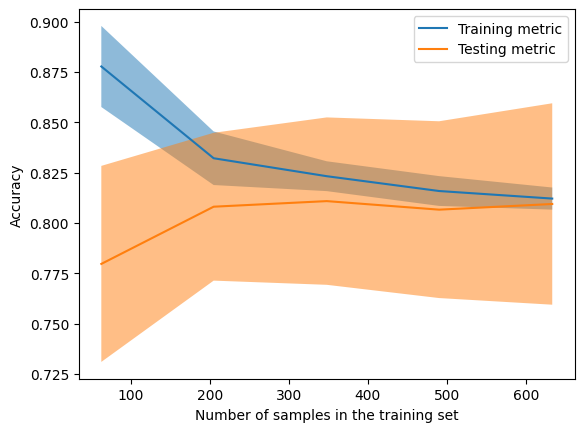

In [429]:
display_cv = LearningCurveDisplay.from_estimator(
    log_reg,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It is not overfitting. The test curve could converge toward the training curve if more training data were added.

Parameter Tuning

In [430]:
log_reg_parameters = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [431]:
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=log_reg_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
log_reg_grid = log_reg_grid.fit(X_train_scaled, y_train)
best_log_reg = log_reg_grid.best_estimator_

print('GridSearchCV Logreg Best Score: ', log_reg_grid.best_score_)
print('GridSearchCV Logreg Best Parameters: ', log_reg_grid.best_params_)
print('GridSearchCV Logreg Best Estimator: ', log_reg_grid.best_estimator_)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
GridSearchCV Logreg Best Score:  0.809476861167002
GridSearchCV Logreg Best Parameters:  {'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
GridSearchCV Logreg Best Estimator:  LogisticRegression(C=0.0001, penalty='none', random_state=42)


In [432]:
best_cv_score_log_reg = cross_val_score(best_log_reg, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_log_reg.mean(), best_cv_score_log_reg.std()))

log_reg_results['Logistic Regression Tuned CV Accuracy'] = round(best_cv_score_log_reg.mean() * 100, 2 )

The mean is 0.809476861167002 and std is 0.0500214682929211


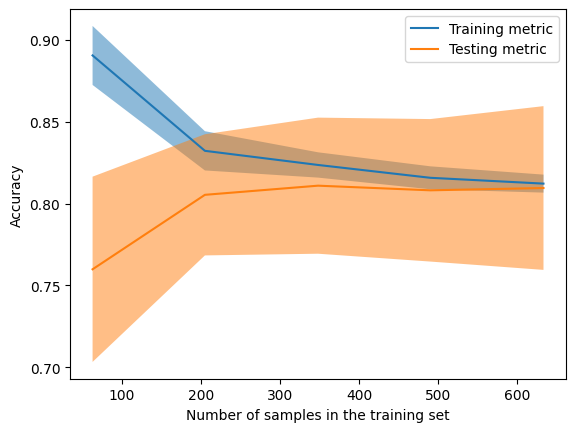

In [433]:
display_cv = LearningCurveDisplay.from_estimator(
    best_log_reg,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Great

In [434]:
log_reg_results

{'Logistic Regression Accuracy': 77.97,
 'Logistic Regression KFold': 80.95,
 'Logistic Regression Tuned CV Accuracy': 80.95}

In [435]:
log_reg_results_frame = pd.DataFrame.from_dict(log_reg_results, columns=['Score'], orient='index')
log_reg_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
Logistic Regression Accuracy,77.970000
Logistic Regression KFold,80.950000
Logistic Regression Tuned CV Accuracy,80.950000


# *gaussian naive bayes*

In [436]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [437]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       104
           1       0.78      0.73      0.75        73

    accuracy                           0.80       177
   macro avg       0.80      0.79      0.79       177
weighted avg       0.80      0.80      0.80       177



In [438]:
nb_results = {
  'Naive Bayes Accuracy': round(accuracy_score(nb_pred, y_test) * 100, 2)
}

nb_results

{'Naive Bayes Accuracy': 80.23}

In [439]:
print(confusion_matrix(y_test, nb_pred))

[[89 15]
 [20 53]]


In [440]:
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  53
True Negative (TN):  89
False Positive (FP):  15
False Negative (FN):  20


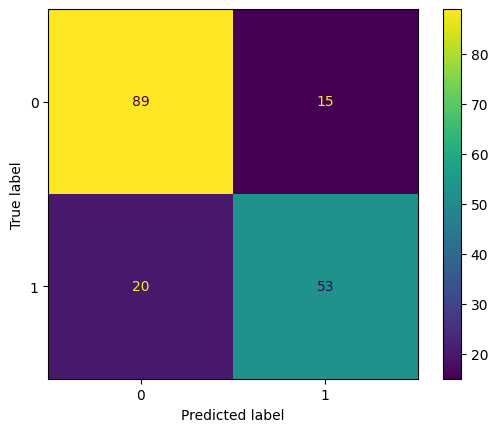

In [441]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, nb_pred), display_labels=nb.classes_).plot()
plt.show()

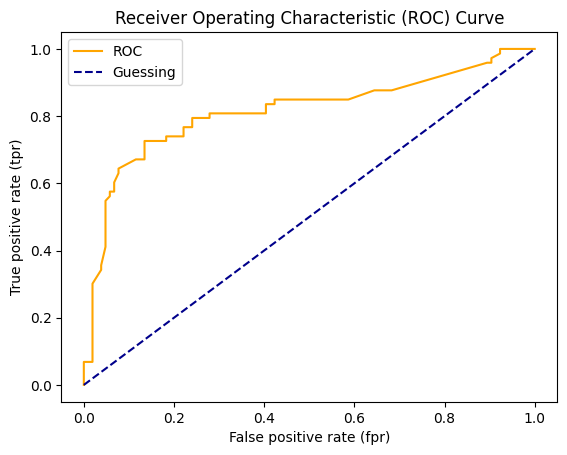

0.8134220231822972

In [442]:
y_probs = nb.predict_proba(X_test)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check overfitting

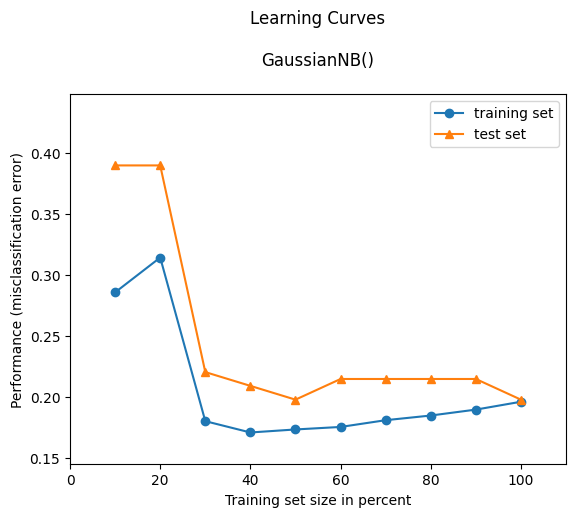

In [443]:
plot_learning_curves(X_train, y_train, X_test, y_test, nb)
plt.show()

It is not overfitting. The test curve is converging toward the training curve.

In [444]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_nb = cross_val_score(nb, X_train, y_train, cv=kfold, scoring='accuracy')

nb_results['Naive Bayes KFold'] = round(kfold_result_nb.mean() * 100, 2 )

print('The kfold value of mean is {} and std is {}'.format(kfold_result_nb.mean(), kfold_result_nb.std()))

The kfold value of mean is 0.7982494969818913 and std is 0.04554409846870761


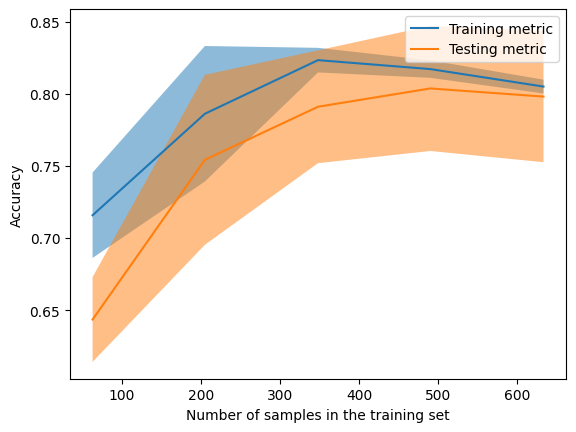

In [445]:
display_cv = LearningCurveDisplay.from_estimator(
    nb,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It is not overfitting. The test curve could converge towards the training curve if more training data were added.

Parameter Tuning

In [446]:
nb_parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
    }

In [447]:
nb_grid = GridSearchCV(estimator=nb, param_grid=nb_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
nb_grid = nb_grid.fit(X_train, y_train)
best_nb = nb_grid.best_estimator_

print('GridSearchCV gNB Best Score: ', nb_grid.best_score_)
print('GridSearchCV gNB Best Parameters: ', nb_grid.best_params_)
print('GridSearchCV gNB Best Estimator: ', nb_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GridSearchCV gNB Best Score:  0.7996579476861168
GridSearchCV gNB Best Parameters:  {'var_smoothing': 0.001873817422860383}
GridSearchCV gNB Best Estimator:  GaussianNB(var_smoothing=0.001873817422860383)


In [448]:
best_cv_score_nb = cross_val_score(best_nb, X_train, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_nb.mean(), best_cv_score_nb.std()))

nb_results['Naive Bayes Tuned CV Accuracy'] = round(best_cv_score_nb.mean() * 100, 2 )

The mean is 0.7996579476861168 and std is 0.0463104642763407


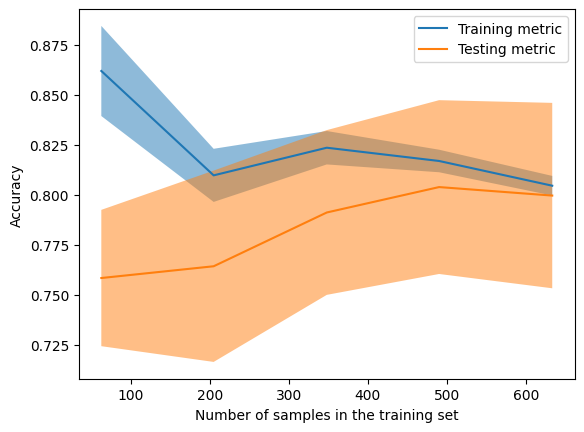

In [449]:
display_cv = LearningCurveDisplay.from_estimator(
    best_nb,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Great

In [450]:
nb_results

{'Naive Bayes Accuracy': 80.23,
 'Naive Bayes KFold': 79.82,
 'Naive Bayes Tuned CV Accuracy': 79.97}

In [451]:
nb_results_frame = pd.DataFrame.from_dict(nb_results, columns=['Score'], orient='index')
nb_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
Naive Bayes Accuracy,80.230000
Naive Bayes KFold,79.820000
Naive Bayes Tuned CV Accuracy,79.970000


# *SVM*

In [452]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)
svc_pred = svc.predict(X_test_scaled)

In [453]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       104
           1       0.86      0.60      0.71        73

    accuracy                           0.80       177
   macro avg       0.82      0.77      0.78       177
weighted avg       0.81      0.80      0.79       177



In [454]:
svm_results = {
  'SVM Accuracy': round(accuracy_score(svc_pred, y_test) * 100, 2)
}

svm_results

{'SVM Accuracy': 79.66}

In [455]:
print(confusion_matrix(y_test, svc_pred))

[[97  7]
 [29 44]]


In [456]:
tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  44
True Negative (TN):  97
False Positive (FP):  7
False Negative (FN):  29


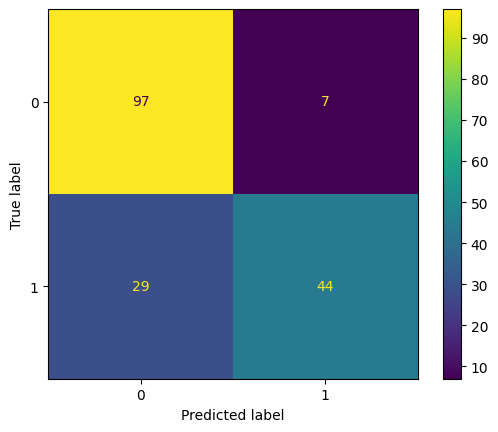

In [457]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, svc_pred), display_labels=svc.classes_).plot()
plt.show()

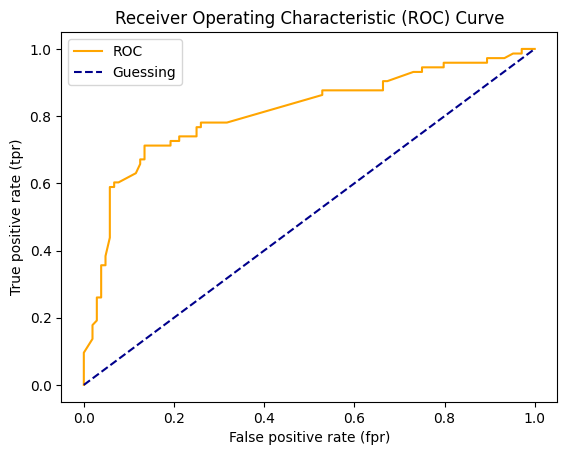

0.8107876712328766

In [458]:
y_probs = svc.predict_proba(X_test_scaled)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check overfitting

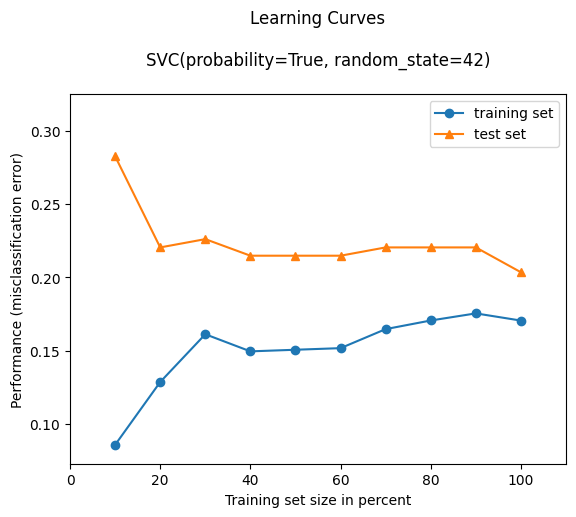

In [459]:
plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, svc)
plt.show()

It's not overfitting but it can be over time.

In [460]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_svm = cross_val_score(svc, X_train_scaled, y_train, cv = kfold, scoring = 'accuracy')

svm_results['SVM KFold'] = round(kfold_result_svm.mean() * 100, 2 )

print('The kfold value of mean is {} and std is {}'.format(kfold_result_svm.mean(), kfold_result_svm.std()))

The kfold value of mean is 0.7995975855130786 and std is 0.03023174822432139


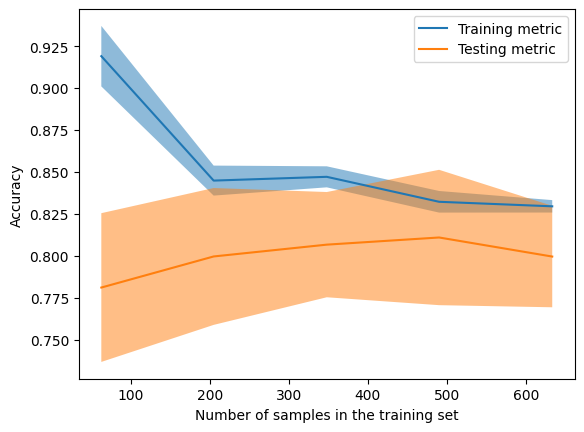

In [461]:
display_cv = LearningCurveDisplay.from_estimator(
    svc,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It is not overfitting. The test curve could converge towards the training curve if more training data were added.

Parameter Tuning

In [462]:
svm_parameters = {
          'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf'] # 'linear' calculation time too long.
                  }

In [463]:
svc_grid = GridSearchCV(estimator=svc, param_grid=svm_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
svc_grid = svc_grid.fit(X_train_scaled, y_train)
best_svc = svc_grid.best_estimator_

print('GridSearchCV SVC Best Score: ', svc_grid.best_score_)
print('GridSearchCV SVC Best Parameters: ', svc_grid.best_params_)
print('GridSearchCV SVC Best Estimator: ', svc_grid.best_estimator_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
GridSearchCV SVC Best Score:  0.8081086519114689
GridSearchCV SVC Best Parameters:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
GridSearchCV SVC Best Estimator:  SVC(C=1000, gamma=0.001, probability=True, random_state=42)


In [464]:
best_cv_score_svc = cross_val_score(best_svc, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_svc.mean(), best_cv_score_svc.std()))

svm_results['SVM Tuned CV Accuracy'] = round(best_cv_score_svc.mean() * 100, 2 )

The mean is 0.8081086519114689 and std is 0.04522170732803726


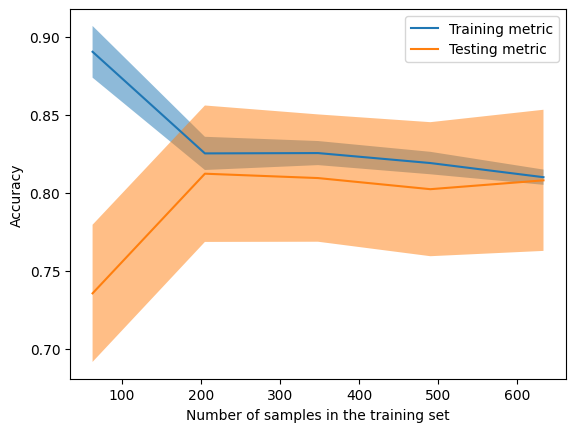

In [465]:
display_cv = LearningCurveDisplay.from_estimator(
    best_svc,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Good

In [466]:
svm_results

{'SVM Accuracy': 79.66, 'SVM KFold': 79.96, 'SVM Tuned CV Accuracy': 80.81}

In [467]:
svm_results_frame = pd.DataFrame.from_dict(svm_results, columns=['Score'], orient='index')
svm_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
SVM Accuracy,79.660000
SVM KFold,79.960000
SVM Tuned CV Accuracy,80.810000


# *decision tree*

In [468]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [469]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       104
           1       0.76      0.58      0.66        73

    accuracy                           0.75       177
   macro avg       0.75      0.73      0.73       177
weighted avg       0.75      0.75      0.74       177



In [470]:
dt_results = {
  'DT Accuracy': round(accuracy_score(dt_pred, y_test) * 100, 2)
}

dt_results

{'DT Accuracy': 75.14}

In [471]:
print(confusion_matrix(y_test, dt_pred))

[[91 13]
 [31 42]]


In [472]:
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  42
True Negative (TN):  91
False Positive (FP):  13
False Negative (FN):  31


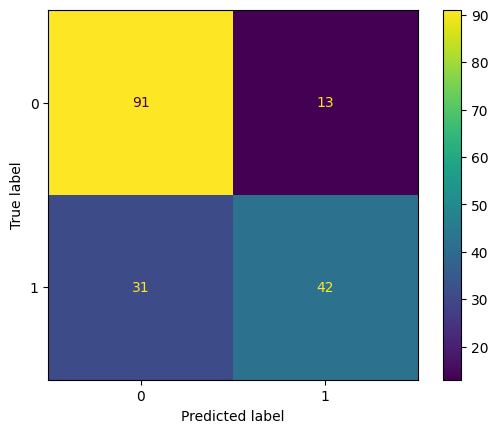

In [473]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_pred), display_labels=dt.classes_).plot()
plt.show()

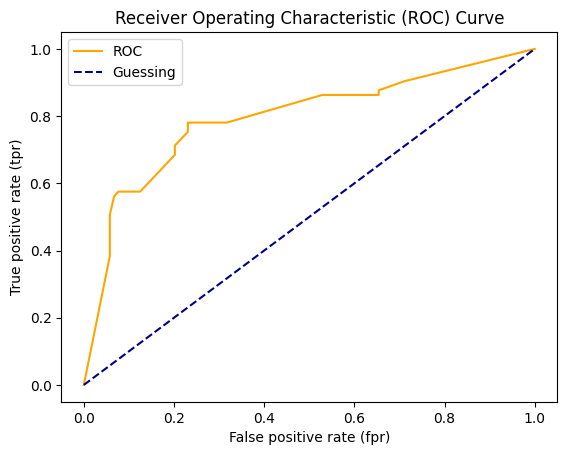

0.7942571127502633

In [474]:
y_probs = dt.predict_proba(X_test)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check overfitting

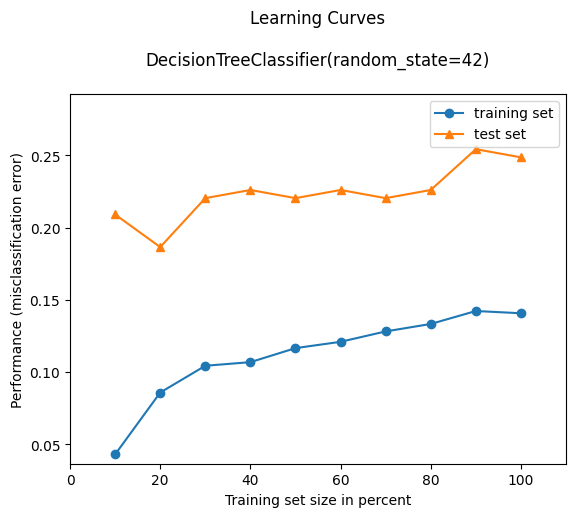

In [475]:
plot_learning_curves(X_train, y_train, X_test, y_test, dt)
plt.show()

Not good

In [476]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_dt = cross_val_score(dt, X_train, y_train, cv=kfold, scoring='accuracy')

dt_results['DT KFold'] = round(kfold_result_dt.mean() * 100, 2 )

print('The kfold value of mean is {} and std is {}'.format(kfold_result_dt.mean(), kfold_result_dt.std()))

The kfold value of mean is 0.8024748490945675 and std is 0.043751454448564195


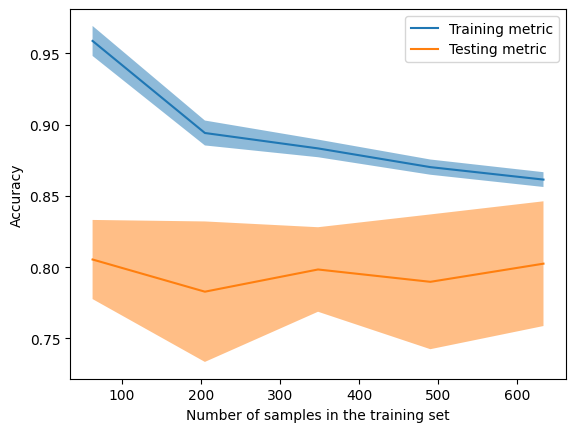

In [477]:
display_cv = LearningCurveDisplay.from_estimator(
    dt,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Not good

Parameter Tuning

In [478]:
dt_parameters = [
              {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}
              ]

In [479]:
dt_grid = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
dt_grid = dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

print('GridSearchCV DT Best Score: ', dt_grid.best_score_)
print('GridSearchCV DT Best Parameters: ', dt_grid.best_params_)
print('GridSearchCV DT Best Estimator: ', dt_grid.best_estimator_)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
GridSearchCV DT Best Score:  0.8365392354124749
GridSearchCV DT Best Parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
GridSearchCV DT Best Estimator:  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=42)


In [480]:
best_cv_score_dt = cross_val_score(best_dt, X_train, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_dt.mean(), best_cv_score_dt.std()))

dt_results['DT Tuned CV Accuracy'] = round(best_cv_score_dt.mean() * 100, 2 )

The mean is 0.8365392354124749 and std is 0.04508067934455505


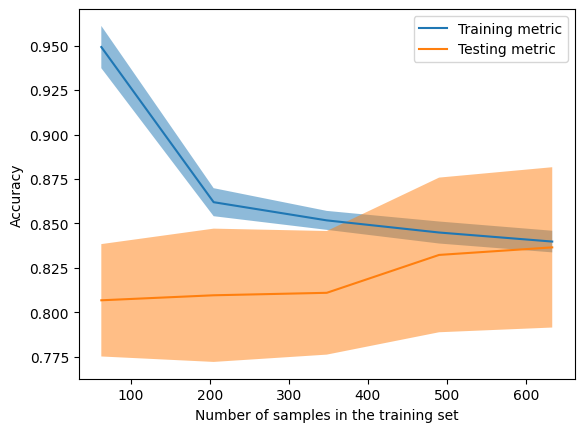

In [481]:
display_cv = LearningCurveDisplay.from_estimator(
    best_dt,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Great

In [482]:
dt_results

{'DT Accuracy': 75.14, 'DT KFold': 80.25, 'DT Tuned CV Accuracy': 83.65}

In [483]:
dt_results_frame = pd.DataFrame.from_dict(dt_results, columns=['Score'], orient='index')
dt_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
DT Accuracy,75.140000
DT KFold,80.250000
DT Tuned CV Accuracy,83.650000


# *random forest*

In [484]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [485]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       104
           1       0.73      0.66      0.69        73

    accuracy                           0.76       177
   macro avg       0.75      0.74      0.75       177
weighted avg       0.76      0.76      0.75       177



In [486]:
rf_results = {
  'RF Accuracy': round(accuracy_score(rf_pred, y_test) * 100, 2)
}

rf_results

{'RF Accuracy': 75.71}

In [487]:
print(confusion_matrix(y_test, rf_pred))

[[86 18]
 [25 48]]


In [488]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  48
True Negative (TN):  86
False Positive (FP):  18
False Negative (FN):  25


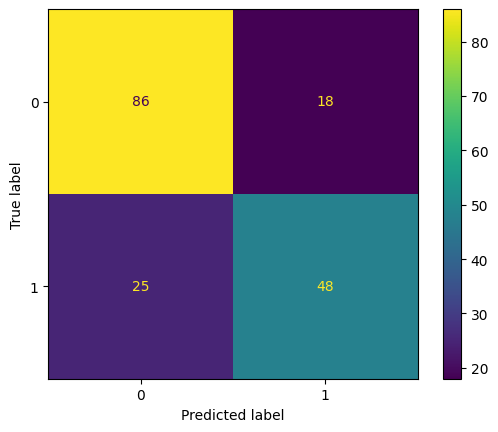

In [489]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, rf_pred), display_labels=rf.classes_).plot()
plt.show()

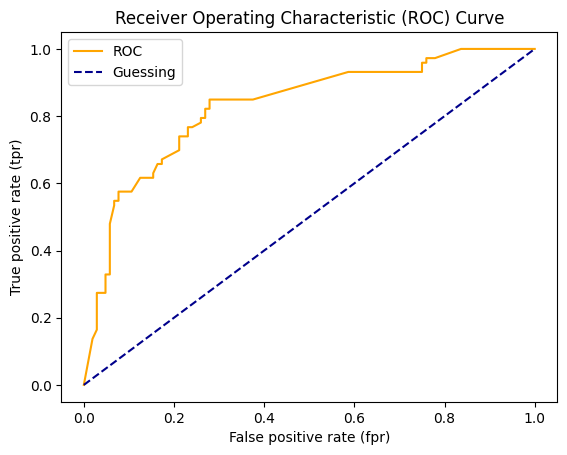

0.8286354056902002

In [490]:
y_probs = rf.predict_proba(X_test)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check Overfitting

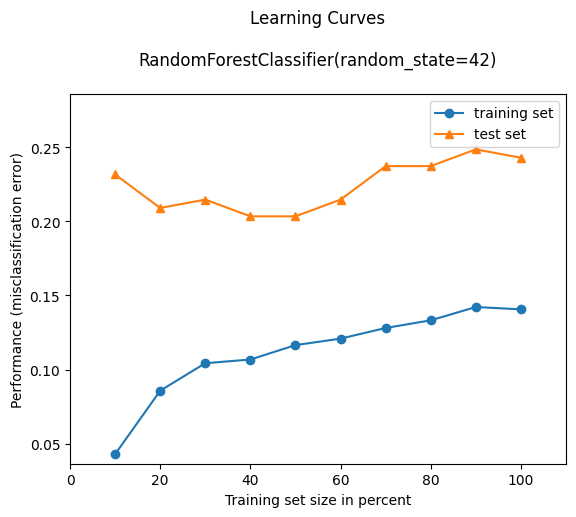

In [491]:
plot_learning_curves(X_train, y_train, X_test, y_test, rf)
plt.show()

It may or may not be overfitting, let's check the CV.

In [492]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_rf = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')

rf_results['RF KFold'] = round(kfold_result_rf.mean() * 100, 2 )

print('The kfold value of mean is {} and std is {}'.format(kfold_result_rf.mean(), kfold_result_rf.std()))

The kfold value of mean is 0.8066800804828974 and std is 0.05387823556969542


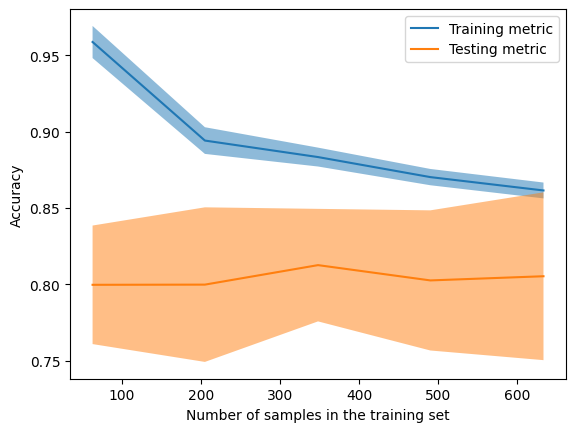

In [493]:
display_cv = LearningCurveDisplay.from_estimator(
    rf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It may or may not be overfitting, let's tune the parameters.

In [494]:
rf_parameters = [
    {'n_estimators': [10, 25], 'max_features': [5, 10],
     'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

In [495]:
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
rf_grid = rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

print('GridSearchCV RF Best Score: ', rf_grid.best_score_)
print('GridSearchCV RF Best Parameters: ', rf_grid.best_params_)
print('GridSearchCV RF Best Estimator: ', rf_grid.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
GridSearchCV RF Best Score:  0.8081891348088531
GridSearchCV RF Best Parameters:  {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
GridSearchCV RF Best Estimator:  RandomForestClassifier(max_depth=50, max_features=5, n_estimators=10,
                       random_state=42)


In [496]:
best_cv_score_rf = cross_val_score(best_rf, X_train, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_rf.mean(), best_cv_score_rf.std()))

rf_results['RF Tuned CV Accuracy'] = round(best_cv_score_rf.mean() * 100, 2 )

The mean is 0.8081891348088531 and std is 0.04168517348808795


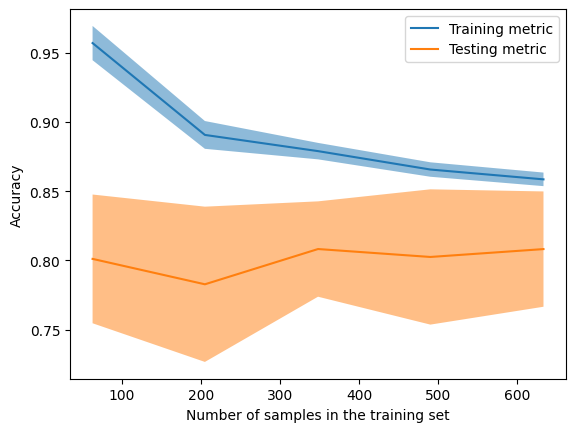

In [497]:
display_cv = LearningCurveDisplay.from_estimator(
    best_rf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It may or may not be overfitting. This model is not very good.

In [498]:
rf_results

{'RF Accuracy': 75.71, 'RF KFold': 80.67, 'RF Tuned CV Accuracy': 80.82}

In [499]:
rf_results_frame = pd.DataFrame.from_dict(rf_results, columns=['Score'], orient='index')
rf_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
RF Accuracy,75.710000
RF KFold,80.670000
RF Tuned CV Accuracy,80.820000


# *KNN*

In [500]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

In [501]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       104
           1       0.80      0.66      0.72        73

    accuracy                           0.79       177
   macro avg       0.79      0.77      0.78       177
weighted avg       0.79      0.79      0.79       177



In [502]:
knn_results = {
  'KNN Accuracy': round(accuracy_score(knn_pred, y_test) * 100, 2)}

knn_results

{'KNN Accuracy': 79.1}

In [503]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  48
True Negative (TN):  92
False Positive (FP):  12
False Negative (FN):  25


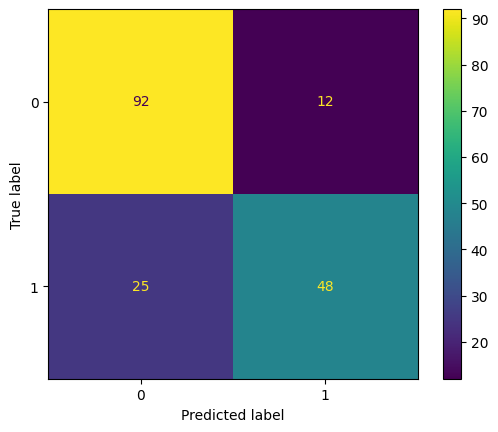

In [504]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, knn_pred), display_labels=knn.classes_).plot()
plt.show()

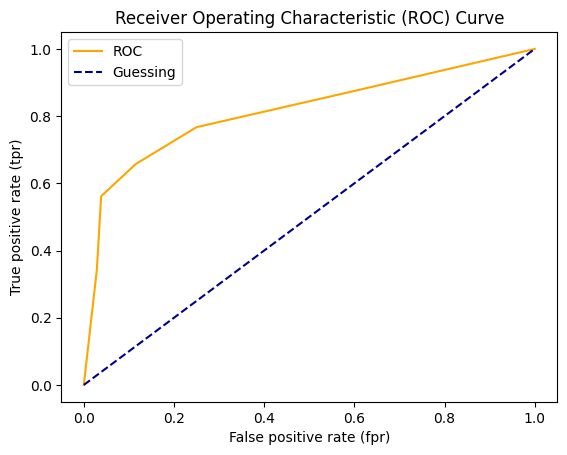

0.8144099051633298

In [505]:
y_probs = knn.predict_proba(X_test_scaled)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check Overfitting

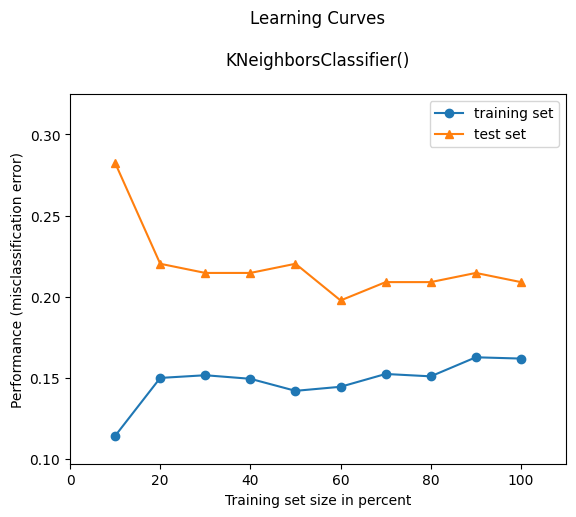

In [506]:
plot_learning_curves(X_train_scaled, y_train, X_test_scaled, y_test, knn)
plt.show()

It is not overfitting. The test curve could converge towards the training curve if more training data were added.

In [507]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_knn = cross_val_score(knn, X_train_scaled, y_train, cv = kfold, scoring = 'accuracy')

knn_results['KNN KFold'] =  round(kfold_result_knn.mean() * 100, 2)

print('The kfold value of mean is {} and std is {}'.format(kfold_result_knn.mean(), kfold_result_svm.std()))

The kfold value of mean is 0.8123742454728371 and std is 0.03023174822432139


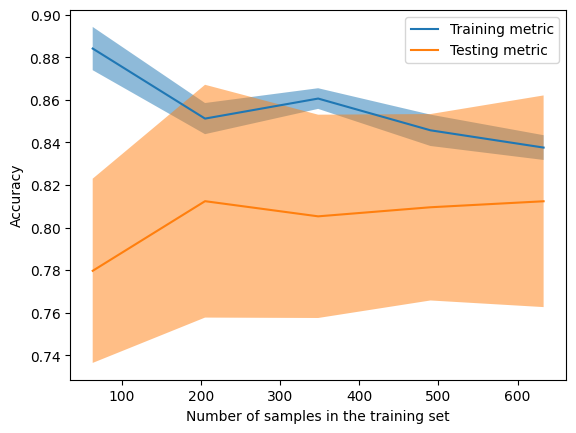

In [508]:
display_cv = LearningCurveDisplay.from_estimator(
    knn,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Not good. Let's tune parameters.

In [509]:
knn_parameters = [
    {
    'n_neighbors': [5, 11, 33, 55, 115, 291, 341],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'leaf_size': [1, 5, 10, 20, 30]
    }
]

In [510]:
knn_grid = GridSearchCV(estimator=knn, param_grid=knn_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
knn_grid = knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_

print('GridSearchCV KNN Best Score: ', knn_grid.best_score_)
print('GridSearchCV KNN Best Parameters: ', knn_grid.best_params_)
print('GridSearchCV KNN Best Estimator: ', knn_grid.best_estimator_)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
GridSearchCV KNN Best Score:  0.8123943661971831
GridSearchCV KNN Best Parameters:  {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}
GridSearchCV KNN Best Estimator:  KNeighborsClassifier(leaf_size=10)


In [511]:
best_cv_score_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_knn.mean(), best_cv_score_knn.std()))

knn_results['KNN Tuned CV Accuracy'] = round(best_cv_score_knn.mean() * 100, 2 )

The mean is 0.8123943661971831 and std is 0.044021202068943985


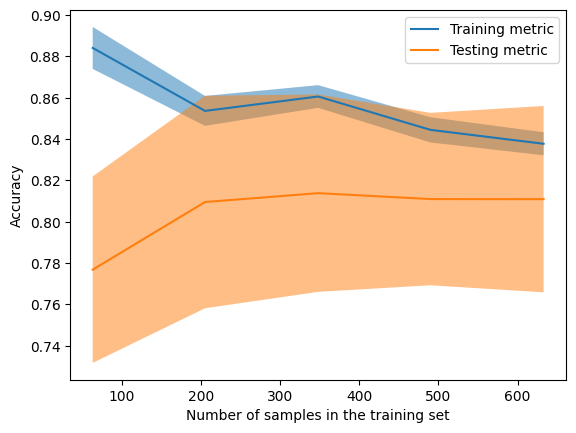

In [512]:
display_cv = LearningCurveDisplay.from_estimator(
    best_knn,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Better than above.

In [513]:
knn_results

{'KNN Accuracy': 79.1, 'KNN KFold': 81.24, 'KNN Tuned CV Accuracy': 81.24}

In [514]:
knn_results_frame = pd.DataFrame.from_dict(knn_results, columns=['Score'], orient='index')
knn_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
KNN Accuracy,79.100000
KNN KFold,81.240000
KNN Tuned CV Accuracy,81.240000


# *gradient boosting classifier*

In [515]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [516]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       104
           1       0.80      0.67      0.73        73

    accuracy                           0.80       177
   macro avg       0.80      0.78      0.78       177
weighted avg       0.80      0.80      0.79       177



In [517]:
gb_results = {
  'GB Accuracy': round(accuracy_score(gb_pred, y_test) * 100, 2)
}

gb_results

{'GB Accuracy': 79.66}

In [518]:
print(confusion_matrix(y_test, gb_pred))

[[92 12]
 [24 49]]


In [519]:
tn, fp, fn, tp = confusion_matrix(y_test, gb_pred).ravel()

print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)

True Positive (TP):  49
True Negative (TN):  92
False Positive (FP):  12
False Negative (FN):  24


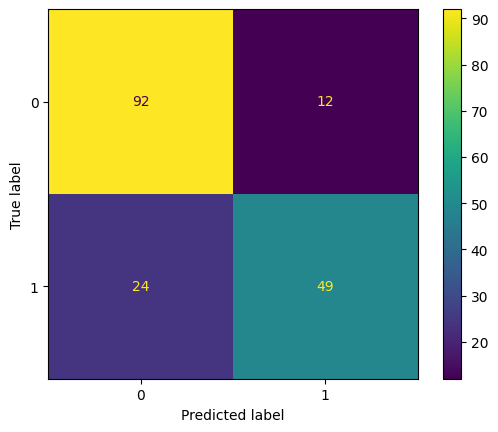

In [520]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, gb_pred), display_labels=gb.classes_).plot()
plt.show()

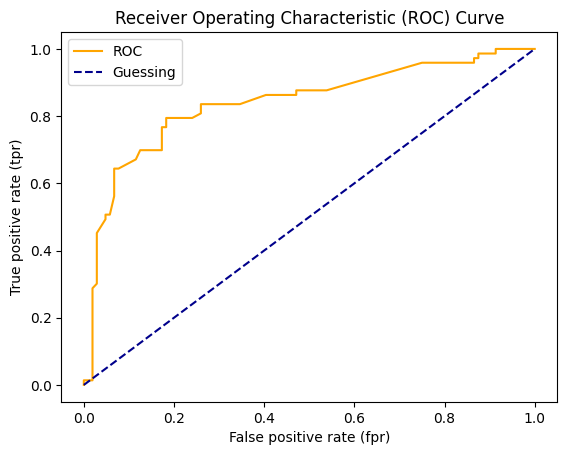

0.8395021074815595

In [521]:
y_probs = gb.predict_proba(X_test)
y_probs[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

roc_auc_score(y_test, y_probs[:, 1])

Check Overfitting

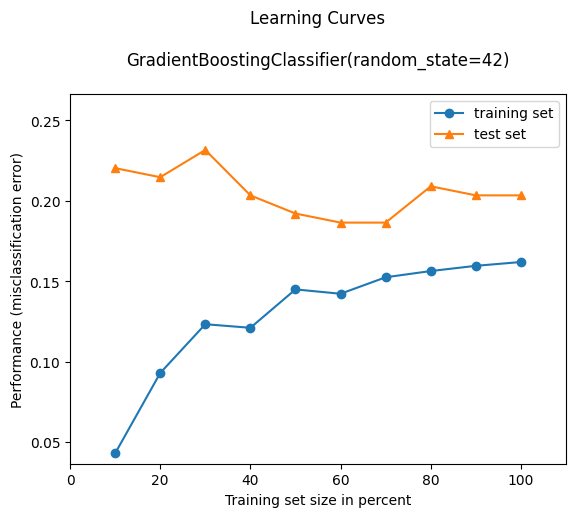

In [522]:
plot_learning_curves(X_train, y_train, X_test, y_test, gb)
plt.show()

It is not overfitting. The test curve could converge towards the training curve if more training data were added.

In [523]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

kfold_result_gb = cross_val_score(gb, X_train, y_train, cv=kfold, scoring = 'accuracy')

gb_results['GB KFold'] = round(kfold_result_gb.mean() * 100, 2)

print('The kfold value of mean is {} and std is {}'.format(kfold_result_gb.mean(), kfold_result_gb.std()))

The kfold value of mean is 0.8066800804828974 and std is 0.040016352336861204


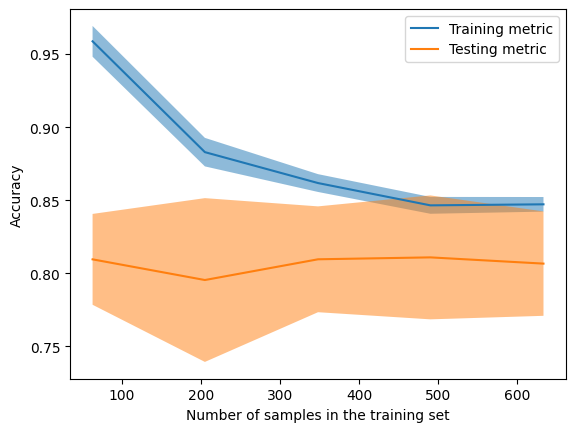

In [524]:
display_cv = LearningCurveDisplay.from_estimator(
    gb,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

It may or may not be overfitting, let's tune parameters.

In [525]:
gb_parameters = [
    {'n_estimators':range(10,100,10)}
]

In [526]:
gb_grid = GridSearchCV(estimator=gb, param_grid=gb_parameters, cv=kfold, scoring='accuracy', n_jobs=-1, verbose=True)
gb_grid = gb_grid.fit(X_train, y_train)
best_gb = gb_grid.best_estimator_

print('GridSearchCV Logreg Best Score: ', gb_grid.best_score_)
print('GridSearchCV Logreg Best Parameters: ', gb_grid.best_params_)
print('GridSearchCV Logreg Best Estimator: ', gb_grid.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
GridSearchCV Logreg Best Score:  0.8294164989939639
GridSearchCV Logreg Best Parameters:  {'n_estimators': 50}
GridSearchCV Logreg Best Estimator:  GradientBoostingClassifier(n_estimators=50, random_state=42)


In [527]:
best_cv_score_gb = cross_val_score(best_gb, X_train, y_train, cv=kfold, scoring='accuracy')
print('The mean is {} and std is {}'.format(best_cv_score_gb.mean(), best_cv_score_gb.std()))

gb_results['GB Tuned CV Accuracy'] = round(best_cv_score_gb.mean() * 100, 2 )

The mean is 0.8294164989939639 and std is 0.03490140172291612


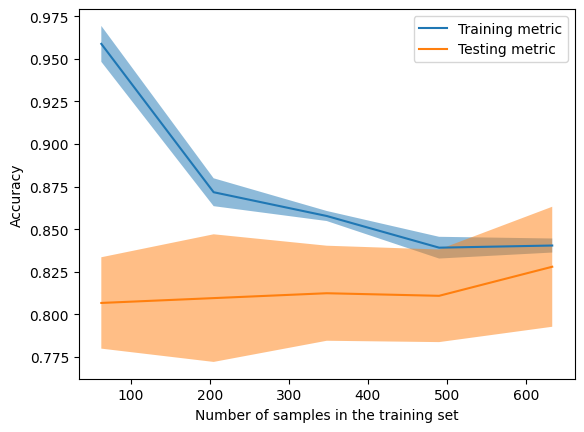

In [528]:
display_cv = LearningCurveDisplay.from_estimator(
    best_gb,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, num=5, endpoint=True),
    cv=kfold,
    score_type='both',
    scoring='accuracy',
    score_name='Accuracy'
)

Good

In [529]:
gb_results

{'GB Accuracy': 79.66, 'GB KFold': 80.67, 'GB Tuned CV Accuracy': 82.94}

In [530]:
gb_results_frame = pd.DataFrame.from_dict(gb_results, columns=['Score'], orient='index')
gb_results_frame.style.highlight_max(color = 'red', axis = 0)

,Score
GB Accuracy,79.660000
GB KFold,80.670000
GB Tuned CV Accuracy,82.940000


# Results

In [531]:
frames = [gb_results_frame, knn_results_frame, rf_results_frame, dt_results_frame, svm_results_frame, nb_results_frame, log_reg_results_frame]
result = pd.concat(frames).sort_values(by='Score', ascending=False).style.highlight_max(color = 'red', axis = 0)
result

,Score
DT Tuned CV Accuracy,83.650000
GB Tuned CV Accuracy,82.940000
KNN KFold,81.240000
KNN Tuned CV Accuracy,81.240000
Logistic Regression Tuned CV Accuracy,80.950000
Logistic Regression KFold,80.950000
RF Tuned CV Accuracy,80.820000
SVM Tuned CV Accuracy,80.810000
GB KFold,80.670000
RF KFold,80.670000


# Test and Submission

In [532]:
df_test.head()

,Pclass,Age,Fare,family,Sex_male,Embarked_q,Embarked_s
881,3,1,0,0,1,1,0
882,3,2,0,1,0,0,1
883,2,3,0,0,1,1,0
884,3,1,0,0,1,0,1
885,3,1,0,2,0,0,1


In [533]:
passenger_id

881      892
882      893
883      894
884      895
885      896
        ... 
1294    1305
1295    1306
1296    1307
1297    1308
1298    1309
Name: PassengerId, Length: 418, dtype: int64

In [534]:
test_results = best_dt.predict(df_test)
submission = pd.DataFrame({'PassengerId': passenger_id , 'Survived': test_results})
submission.to_csv('Titanic_Submission.csv' , index = False)
submission

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1
...,...,...
1294,1305,0
1295,1306,1
1296,1307,0
1297,1308,0
